## Supplementary notebook for Size matters: Tissue size as a marker for a transition between Reaction-Diffusion regimes in spatiotemporal distribution of morphogens.
### Alberto S. Ceccarelli <sup>1</sup> , Augusto Borges <sup>1, 2, 3</sup> & Osvaldo Chara <sup>1,4,5</sup>
##### 1 Systems Biology Group, Institute of Physics of Liquids and Biological Systems, National Scientific and Technical Research Council, University of La Plata, La Plata, Argentina.
##### 2 Research Unit of Sensory Biology & Organogenesis, Helmholtz Zentrum München, Munich, Germany.
##### 3 Graduate School of Quantitative Biosciences (QBM), Munich, Germany.
##### 4 Center for Information Services and High Performance Computing, Technische Universität Dresden, Dresden, Germany.
##### 5 Instituto de Tecnología, Universidad Argentina de la Empresa (UADE), Buenos Aires, Argentina.
##### *Corresponding author:
##### Osvaldo Chara
##### Center for Information Services and High Performance Computing (ZIH), Technische Universität Dresden, Nöthnitzer Straße 46, 01187 Dresden, Germany. Tel. +49 351 463-38780, E-mail: osvaldo.chara@tu-dresden.de
##### Systems Biology Group (SysBio), Institute of Physics of Liquids and Biological Systems (IFLySIB), National Scientific and Technical Research Council (CONICET) and University of La Plata, Calle 59 N 789, 1900 La Plata, Argentina. Tel. +54 221 4233283 Ext: 26, E-mail: ochara@iflysib.unlp.edu.ar Web: http://sysbioiflysib.wordpress.com/

## The next cell plots fig 6 from the paper.
#### Run the following cell to plot fig 6 from the paper and to save it as a png image.
##### Expected computational time: 5 seconds.

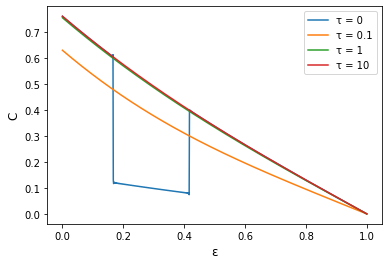

My program took 6.967573165893555 seconds to run


In [8]:
# Import the necessary libraries.
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special
import time
# Start the timer to know how long the program took to run.
start_time = time.time()

# Define functions used to calculate the morphogen concentration

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return (j+1/2)*np.pi/R

def fj(x,t,j):
    return -(1/(aux(j)**2+1))+(1/(aux(j)**2))-(b-1)*(1/(aux(j)**2+1))*(-aux(j)*np.sin(aux(j)*d)*np.sinh(R-d)/np.cosh(R)+np.cos(aux(j)*d)*np.cosh(R-d)/np.cosh(R)+aux(j)*np.sin(aux(j)*(d+h))*np.sinh(R-(d+h))/np.cosh(R)-np.cos(aux(j)*(d+h))*np.cosh(R-(d+h))/np.cosh(R))
    
    
def Fi(x,t,j):
    return (1/(aux(j)**2))*(1/(aux(j)**2+1))*(1-(np.exp(-((((aux(j))**2)+1)*t))))
# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
#     return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))
    return np.cos(aux(j)*x)*(fj(x,t,j)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(x,t,j))
# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j):
#     return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))
    return (-2/R)*sum(aux2(x,t,j))-(x-R)

# Define an array of terms to be used when calculating c_finite(x,t,j)
j = np.arange(0,5000,1)
# Define the length of the tissues that are going to be simulated and the other parameters.
R = 1
b=0.2
d=R/6
h=R/4
# Create an array of spatial coordintates for a tissue of length R.
xi_all = np.arange(0,R,R/1000)
# A loop that goes through all desired times.
for tf_counter in [0, 0.01, 0.1, 1, 10]:
# Define empty array to fill with the concentration calculated.
    c1_finite = []
# Loop in every position in space.
    for xi in xi_all:
#  Fill the arrays with the calculated concentration.
        c1_finite.append(c_finite(xi,tf_counter,j))
# Plots the concentration in a finite tissue as a continuous line.
    plt.plot(xi_all, c1_finite, label="τ = "+str(tf_counter))
# adds legend to the plot
plt.legend(prop={'size': 10})

# Axis label is added and the figure is saved as figsup.png and shown. 
plt.xlabel('ε',fontsize=12)
plt.ylabel('C',fontsize=12)
plt.savefig("fig6a.png", dpi=500)
plt.show()
# Shows on screen how much time it took the program to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")

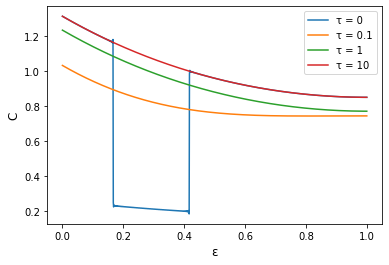

My program took 1423.7153208255768 seconds to run


In [7]:
# Import the necessary libraries.
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special
import time
# Start the timer to know how long the program took to run.
start_time = time.time()

# Define functions used to calculate the morphogen concentration

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return j*np.pi/R

def fj(x,t,j):
    if j==0:
        return ((R**2)/3+1)+(b-1)*(np.cosh(R)/np.sinh(R)*(np.sinh(d+h)-np.sinh(d))+np.cosh(d)-np.cosh(d+h))
    else:
        return (1/(aux(j)**2+1))-(1/(aux(j)**2))+(b-1)*(1/(aux(j)**2+1))*(np.cos(aux(j)*d)*np.sinh(R-d)/np.sinh(R)-aux(j)*np.sin(aux(j)*d)*np.cosh(R-d)/np.sinh(R)-np.cos(aux(j)*(d+h))*np.sinh(R-(d+h))/np.sinh(R)+aux(j)*np.sin(aux(j)*(d+h))*np.cosh(R-(d+h))/np.sinh(R))
    
def Fi(x,t,j):
    if j==0:
        return ((R**2)/3+1)*(1/(aux(j)**2+1))*(1-(np.exp(-((((aux(j))**2)+1)*t))))
    else:
        return -(1/(aux(j)**2))*(1/(aux(j)**2+1))*(1-(np.exp(-((((aux(j))**2)+1)*t))))
# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
#     return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))
    if j==0:
        return (1/R)*(fj(x,t,j)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(x,t,j))
    else:
        return (2/R)*np.cos(aux(j)*x)*(fj(x,t,j)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(x,t,j))
# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j):
#     return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))
    pepito = []
    for ji in j:
        pepito.append(aux2(x,t,ji))
#     return sum(aux2(x,t,j))-(x-x**2/(2*R))
    return sum(pepito)-(x-x**2/(2*R))

# Define an array of terms to be used when calculating c_finite(x,t,j)
j = np.arange(0,5000,1)
# Define the length of the tissues that are going to be simulated and the other parameters.
R = 1
b=0.2
d=R/6
h=R/4
# Create an array of spatial coordintates for a tissue of length R.
xi_all = np.arange(0,R,R/1000)
# A loop that goes through all desired times.
for tf_counter in [0, 0.01, 0.1, 1, 10]:
# Define empty array to fill with the concentration calculated.
    c1_finite = []
# Loop in every position in space.
    for xi in xi_all:
#  Fill the arrays with the calculated concentration.
        c1_finite.append(c_finite(xi,tf_counter,j))
# Plots the concentration in a finite tissue as a continuous line.
    plt.plot(xi_all, c1_finite, label="τ = "+str(tf_counter))
# adds legend to the plot
plt.legend(prop={'size': 10})

# Axis label is added and the figure is saved as figsup.png and shown. 
plt.xlabel('ε',fontsize=12)
plt.ylabel('C',fontsize=12)
plt.savefig("fig6b.png", dpi=500)
plt.show()
# Shows on screen how much time it took the program to run.
print("My program took "+str(time.time() - start_time)+" seconds to run")

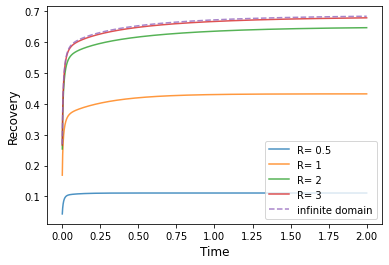

In [4]:
####jasjaskljdklad

from scipy import integrate
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return (j+1/2)*np.pi/R

def aux3(t):
#     return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))
    return (np.sin(aux(j)*(d+h))-np.sin(aux(j)*(d)))*(fj(t)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(t))/aux(j)

def fj(t):
    return -(1/(aux(j)**2+1))+(1/(aux(j)**2))-(b-1)*(1/(aux(j)**2+1))*(-aux(j)*np.sin(aux(j)*d)*np.sinh(R-d)/np.cosh(R)+np.cos(aux(j)*d)*np.cosh(R-d)/np.cosh(R)+aux(j)*np.sin(aux(j)*(d+h))*np.sinh(R-(d+h))/np.cosh(R)-np.cos(aux(j)*(d+h))*np.cosh(R-(d+h))/np.cosh(R))
    
    
def Fi(t):
    return (1/(aux(j)**2))*(1/(aux(j)**2+1))*(1-(np.exp(-((((aux(j))**2)+1)*t))))


def f_inf(t):
    # c0 = -1
    # print(R)
    coef1 = c0/(2*h)
    
    t1 = (np.exp(-(d))*(b+(b-1)*psi + 1)  - 2* np.exp(-(d+h))* ((b-1)*psi + 1))
    
    t2 = (b-1)*(psi - 1 )
    
    s1 = np.exp(h) * special.erf(d/np.sqrt(t)) * np.exp(-(t+d+h))
    s2 = np.exp(-(d)) - np.exp(h) * special.erf(h/(2*np.sqrt(t))) * np.exp(-(t+d+h)) + special.erf(h/(2*np.sqrt(t))) * np.exp(-(t+d+h))
    s3 = special.erf((d+h) / np.sqrt(t)) * np.exp(-(t+d+h)) -  special.erf((2*d + h)/(2*np.sqrt(t))) * np.exp(-(t+d))
    s4 = np.exp(-(d+h)) * special.erf(np.sqrt(t)) + np.exp(-(d)) * special.erf(np.sqrt(t)) + np.exp(-(d+h)) * special.erf((h - 2*t) / (2*np.sqrt(t)))
    s5 = - np.exp(-(d)) * special.erf((2*t + h)/(2 * np.sqrt(t))) 
    
    coef2 = + np.exp(d) * ( \
                                        -special.erf((t + d) / np.sqrt(t)) \
                                        - np.exp(h) * special.erf((t + d+h) / np.sqrt(t)) + \
                                        (1+np.exp(h)) * special.erf((2*t+2*d+h)/(2*np.sqrt(t))))
    
    s6 = - special.erf((2*d+h) / (2*np.sqrt(t))) * np.exp(-(t+d+h))
    
    

    return coef1 * (t1 + t2 * (s1 + s2 + s3 + s4 + s5 + s6 + coef2))

def recovery_fin(t):
    return ((-2/R)*sum(aux3(t))-((d+h)**2/2-(d)**2/2-h*R))/h

lengths = [0.5,1,2,3]
j = np.arange(0,1000,1)
times = np.arange(0.001,2,0.0005)

c0 = 1
psi = 0
d= 1.5/5
h= d/2
b=0.2

for R in lengths:
    recoveryc2 = []
    for ti in times:
        recoveryc2.append(recovery_fin(ti))
    
    plt.plot(times, recoveryc2, label="R= "+str(R), alpha=0.8)
plt.plot(times, f_inf(times), label="infinite domain", ls="dashed", alpha=0.8)

plt.legend(prop={'size': 10})
plt.xticks([0,0.5,1,1.5,2])
plt.xlabel("Time",fontsize=12)
plt.ylabel("Recovery",fontsize=12)
# plt.ylim(0.2,0.8)

plt.savefig("fig6c.png", dpi=500)
plt.show()

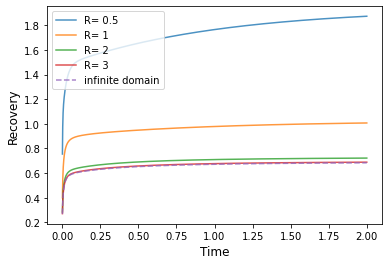

In [4]:
from scipy import integrate
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special

# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return j*np.pi/R

def fj(t,j):
    if j==0:
        return ((R**2)/3+1)+(b-1)*(np.cosh(R)/np.sinh(R)*(np.sinh(d+h)-np.sinh(d))+np.cosh(d)-np.cosh(d+h))
    else:
        return (1/(aux(j)**2+1))-(1/(aux(j)**2))+(b-1)*(1/(aux(j)**2+1))*(np.cos(aux(j)*d)*np.sinh(R-d)/np.sinh(R)-aux(j)*np.sin(aux(j)*d)*np.cosh(R-d)/np.sinh(R)-np.cos(aux(j)*(d+h))*np.sinh(R-(d+h))/np.sinh(R)+aux(j)*np.sin(aux(j)*(d+h))*np.cosh(R-(d+h))/np.sinh(R))
    
    
def Fi(t,j):
    if j==0:
        return ((R**2)/3+1)*(1/(aux(j)**2+1))*(1-(np.exp(-((((aux(j))**2)+1)*t))))
    else:
        return -(1/(aux(j)**2))*(1/(aux(j)**2+1))*(1-(np.exp(-((((aux(j))**2)+1)*t))))
# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
#     return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))
    if j==0:
        return (1/R)*(fj(t,j)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(t,j))
    else:
        return (2/R)*np.cos(aux(j)*x)*(fj(t,j)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(t,j))


def aux3(t,j):
#     return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))
    if j == 0:
        return (1/R)*(fj(t,j)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(t,j))*h
    else:
        return (2/R)*(np.sin(aux(j)*(d+h))-np.sin(aux(j)*(d)))*(fj(t,j)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(t,j))/aux(j)
# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def recovery_fin(t):
#     return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))
    pepito = []
    for ji in j:
        pepito.append(aux3(t,ji))
#     return sum(aux2(x,t,j))-(x-x**2/(2*R))
    return sum(pepito)/h-(((d+h)**2-(d)**2)/2-(((d+h)**3-(d)**3)/3)/(2*R))/h

def f_inf(t):
    # c0 = -1
    # print(R)
    coef1 = c0/(2*h)
    
    t1 = (np.exp(-(d))*(b+(b-1)*psi + 1)  - 2* np.exp(-(d+h))* ((b-1)*psi + 1))
    
    t2 = (b-1)*(psi - 1 )
    
    s1 = np.exp(h) * special.erf(d/np.sqrt(t)) * np.exp(-(t+d+h))
    s2 = np.exp(-(d)) - np.exp(h) * special.erf(h/(2*np.sqrt(t))) * np.exp(-(t+d+h)) + special.erf(h/(2*np.sqrt(t))) * np.exp(-(t+d+h))
    s3 = special.erf((d+h) / np.sqrt(t)) * np.exp(-(t+d+h)) -  special.erf((2*d + h)/(2*np.sqrt(t))) * np.exp(-(t+d))
    s4 = np.exp(-(d+h)) * special.erf(np.sqrt(t)) + np.exp(-(d)) * special.erf(np.sqrt(t)) + np.exp(-(d+h)) * special.erf((h - 2*t) / (2*np.sqrt(t)))
    s5 = - np.exp(-(d)) * special.erf((2*t + h)/(2 * np.sqrt(t))) 
    
    coef2 = + np.exp(d) * ( \
                                        -special.erf((t + d) / np.sqrt(t)) \
                                        - np.exp(h) * special.erf((t + d+h) / np.sqrt(t)) + \
                                        (1+np.exp(h)) * special.erf((2*t+2*d+h)/(2*np.sqrt(t))))
    
    s6 = - special.erf((2*d+h) / (2*np.sqrt(t))) * np.exp(-(t+d+h))
    
    
    
    # return coef1 * (t1 + t2) * ( s1 + s2 + s3 + s4 + s5 + s6)
    return coef1 * (t1 + t2 * (s1 + s2 + s3 + s4 + s5 + s6 + coef2))

# def recovery_analitic(t):
#     return ((-2/R)*sum(aux3(t))-((d+h)**2/2-(d)**2/2-h*R))/h

lengths = [0.5,1,2, 3]
j = np.arange(0,1000,1)
times = np.arange(0.001,2,0.0005)

c0 = 1
psi = 0

d= 1.5/5
h= d/2
b=0.2

for R in lengths:
    recoveryc2 = []
    for ti in times:
        recoveryc2.append(recovery_fin(ti))
    
    plt.plot(times, recoveryc2, label="R= "+str(R), alpha=0.8)
plt.plot(times, f_inf(times), label="infinite domain", ls="dashed", alpha=0.8)

plt.legend(prop={'size': 10})
plt.xticks([0,0.5,1,1.5,2])
plt.xlabel("Time",fontsize=12)
plt.ylabel("Recovery",fontsize=12)
# plt.ylim(0.2,0.8)

plt.savefig("fig6d.png", dpi=500)
plt.show()

<ipython-input-5-17be89e2e3cb>:50: RuntimeWarning: divide by zero encountered in true_divide
  s1 = np.exp(h/characteristic) * special.erf((d/characteristic)/np.sqrt(t)) * np.exp(-(t+d/characteristic+h/characteristic))
<ipython-input-5-17be89e2e3cb>:51: RuntimeWarning: divide by zero encountered in true_divide
  s2 = np.exp(-(d/characteristic)) - np.exp(h/characteristic) * special.erf((h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic+h/characteristic)) + special.erf((h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic+h/characteristic))
<ipython-input-5-17be89e2e3cb>:52: RuntimeWarning: divide by zero encountered in true_divide
  s3 = special.erf((d/characteristic+h/characteristic) / np.sqrt(t)) * np.exp(-(t+d/characteristic+h/characteristic)) -  special.erf((2*d/characteristic + h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic))
<ipython-input-5-17be89e2e3cb>:53: RuntimeWarning: divide by zero encountered in true_divide
  s4 = np.exp(-(d/chara

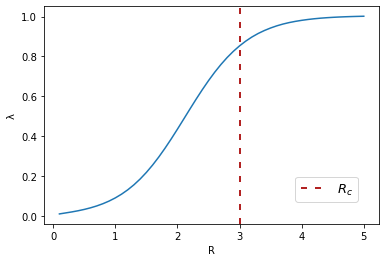

In [5]:
# Import libraries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import special

# Define functions
# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return (j+1/2)*np.pi/R

def fj(t):
    return -(1/(aux(j)**2+1))+(1/(aux(j)**2))-(b-1)*(1/(aux(j)**2+1))*(-aux(j)*np.sin(aux(j)*d)*np.sinh(R-d)/np.cosh(R)+np.cos(aux(j)*d)*np.cosh(R-d)/np.cosh(R)+aux(j)*np.sin(aux(j)*(d+h))*np.sinh(R-(d+h))/np.cosh(R)-np.cos(aux(j)*(d+h))*np.cosh(R-(d+h))/np.cosh(R))
    
    
def Fi(t):
    return (1/(aux(j)**2))*(1/(aux(j)**2+1))*(1-(np.exp(-((((aux(j))**2)+1)*t))))
# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
#     return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))
    return np.cos(aux(j)*x)*(fj(t)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(t))
# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def c_finite(x,t,j):
#     return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))
    return (-2/R)*sum(aux2(x,t,j))-(x-R)


def aux3(t):
#     return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))
    return (np.sin(aux(j)*(d+h))-np.sin(aux(j)*(d)))*(fj(t)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(t))/aux(j)
# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def recovery_analitic(t):
#     return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))
    return ((-2/R)*sum(aux3(t))-((d+h)**2/2-(d)**2/2-h*R))/h


def f_inf(t,characteristic):
   

    coef1 = c0/(2*(h/characteristic))
    
    t1 = (np.exp(-(d/characteristic))*(b+(b-1)*psi + 1)  - 2* np.exp(-(d/characteristic+h/characteristic))* ((b-1)*psi + 1))
    
    t2 = (b-1)*(psi - 1 )
    
    s1 = np.exp(h/characteristic) * special.erf((d/characteristic)/np.sqrt(t)) * np.exp(-(t+d/characteristic+h/characteristic))
    s2 = np.exp(-(d/characteristic)) - np.exp(h/characteristic) * special.erf((h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic+h/characteristic)) + special.erf((h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic+h/characteristic))
    s3 = special.erf((d/characteristic+h/characteristic) / np.sqrt(t)) * np.exp(-(t+d/characteristic+h/characteristic)) -  special.erf((2*d/characteristic + h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic))
    s4 = np.exp(-(d/characteristic+h/characteristic)) * special.erf(np.sqrt(t)) + np.exp(-(d/characteristic)) * special.erf(np.sqrt(t)) + np.exp(-(d/characteristic+h/characteristic)) * special.erf((h/characteristic - 2*t) / (2*np.sqrt(t)))
    s5 = - np.exp(-(d/characteristic)) * special.erf((2*t + h/characteristic)/(2 * np.sqrt(t))) 
    
    coef2 = + np.exp(d/characteristic) * ( \
                                        -special.erf((t + d/characteristic) / np.sqrt(t)) \
                                        - np.exp(h/characteristic) * special.erf((t + d/characteristic+h/characteristic) / np.sqrt(t)) + \
                                        (1+np.exp(h/characteristic)) * special.erf((2*t+2*d/characteristic+h/characteristic)/(2*np.sqrt(t))))
    
    s6 = - special.erf((2*d/characteristic+h/characteristic) / (2*np.sqrt(t))) * np.exp(-(t+d/characteristic+h/characteristic))
    
    
    
    # return coef1 * (t1 + t2) * ( s1 + s2 + s3 + s4 + s5 + s6)
    return coef1 * (t1 + t2 * (s1 + s2 + s3 + s4 + s5 + s6 + coef2))


# Define parameters
# characteristic = 1
lengths=np.arange(0.1,5.1,0.1)
lambdas=[]
j = np.arange(0,1000,1)
d= 0.1/5
h= d/2
b=0.2
c0 = 1
psi = 0
# Loop over diferent tissue sizes
for length in lengths:
    R=length

#     Simulate data using the finite model
    maxtime = 2
    x = np.arange(0,maxtime+maxtime/100,maxtime/100)
    y = []
    for ti in x:
        y.append(recovery_analitic(ti))

#     Calculates the characteristic length from the fit of the infinite solution
    params = curve_fit(f_inf, x, y)
    [a] = params[0]
    lambdas.append(a)

# Plot the results
plt.plot(lengths, lambdas)
plt.axvline(x=3, color="firebrick", ls="--", dashes=(3, 4), label="$R_{c}$",linewidth=2.0)
plt.xlabel('R')
plt.ylabel('λ')
plt.legend(loc=(0.75,0.1),prop={'size': 13})
plt.savefig("fig6e.png",dpi=500)
plt.show()
plt.close()

<ipython-input-6-d75ba2c1f592>:61: RuntimeWarning: divide by zero encountered in true_divide
  s1 = np.exp(h/characteristic) * special.erf((d/characteristic)/np.sqrt(t)) * np.exp(-(t+d/characteristic+h/characteristic))
<ipython-input-6-d75ba2c1f592>:62: RuntimeWarning: divide by zero encountered in true_divide
  s2 = np.exp(-(d/characteristic)) - np.exp(h/characteristic) * special.erf((h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic+h/characteristic)) + special.erf((h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic+h/characteristic))
<ipython-input-6-d75ba2c1f592>:63: RuntimeWarning: divide by zero encountered in true_divide
  s3 = special.erf((d/characteristic+h/characteristic) / np.sqrt(t)) * np.exp(-(t+d/characteristic+h/characteristic)) -  special.erf((2*d/characteristic + h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic))
<ipython-input-6-d75ba2c1f592>:64: RuntimeWarning: divide by zero encountered in true_divide
  s4 = np.exp(-(d/chara

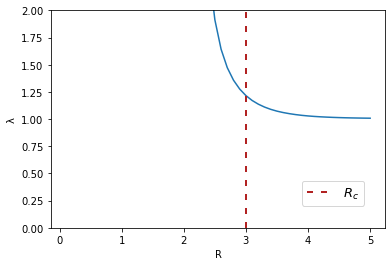

In [6]:
# Import libraries
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import special

# Define functions
# An auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using the 
# analytic solution presented in this work.
def aux(j):
    return j*np.pi/R

def fj(t,j):
    if j==0:
        return ((R**2)/3+1)+(b-1)*(np.cosh(R)/np.sinh(R)*(np.sinh(d+h)-np.sinh(d))+np.cosh(d)-np.cosh(d+h))
    else:
        return (1/(aux(j)**2+1))-(1/(aux(j)**2))+(b-1)*(1/(aux(j)**2+1))*(np.cos(aux(j)*d)*np.sinh(R-d)/np.sinh(R)-aux(j)*np.sin(aux(j)*d)*np.cosh(R-d)/np.sinh(R)-np.cos(aux(j)*(d+h))*np.sinh(R-(d+h))/np.sinh(R)+aux(j)*np.sin(aux(j)*(d+h))*np.cosh(R-(d+h))/np.sinh(R))

def Fi(t,j):
    if j==0:
        return ((R**2)/3+1)*(1/(aux(j)**2+1))*(1-(np.exp(-((((aux(j))**2)+1)*t))))
    else:
        return -(1/(aux(j)**2))*(1/(aux(j)**2+1))*(1-(np.exp(-((((aux(j))**2)+1)*t))))
# Another auxiliary function that will be used when calculating the morphogen concentration in a finite tissue using 
# the analytic solution presented in this work.
def aux2(x,t,j):
    if j==0:
        return (1/R)*(fj(t,j)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(t,j))
    else:
        return (2/R)*np.cos(aux(j)*x)*(fj(t,j)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(t,j))


def aux3(t,j):
#     return np.cos(aux(j)*x)*(1/(aux(j)**2+1))*(np.exp(-((((aux(j))**2)+1)*t)))
    if j == 0:
        return (1/R)*(fj(t,j)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(t,j))*h
    else:
        return (2/R)*(np.sin(aux(j)*(d+h))-np.sin(aux(j)*(d)))*(fj(t,j)*(np.exp(-((((aux(j))**2)+1)*t)))+Fi(t,j))/aux(j)
# This function calculates the morphogen concentration in a finite tissue using the analytic solution presented in 
# this work.
def recovery_fin(t):
#     return (-2/R)*sum(aux2(x,t,j))+(np.exp(-x)/(1+np.exp(-2*R))-np.exp(x)/(1+np.exp(2*R)))
    pepito = []
    for ji in j:
        pepito.append(aux3(t,ji))
#     return sum(aux2(x,t,j))-(x-x**2/(2*R))
    return sum(pepito)/h-(((d+h)**2-(d)**2)/2-(((d+h)**3-(d)**3)/3)/(2*R))/h


def f_inf(t,characteristic):
   

    coef1 = c0/(2*(h/characteristic))
    
    t1 = (np.exp(-(d/characteristic))*(b+(b-1)*psi + 1)  - 2* np.exp(-(d/characteristic+h/characteristic))* ((b-1)*psi + 1))
    
    t2 = (b-1)*(psi - 1 )
    
    s1 = np.exp(h/characteristic) * special.erf((d/characteristic)/np.sqrt(t)) * np.exp(-(t+d/characteristic+h/characteristic))
    s2 = np.exp(-(d/characteristic)) - np.exp(h/characteristic) * special.erf((h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic+h/characteristic)) + special.erf((h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic+h/characteristic))
    s3 = special.erf((d/characteristic+h/characteristic) / np.sqrt(t)) * np.exp(-(t+d/characteristic+h/characteristic)) -  special.erf((2*d/characteristic + h/characteristic)/(2*np.sqrt(t))) * np.exp(-(t+d/characteristic))
    s4 = np.exp(-(d/characteristic+h/characteristic)) * special.erf(np.sqrt(t)) + np.exp(-(d/characteristic)) * special.erf(np.sqrt(t)) + np.exp(-(d/characteristic+h/characteristic)) * special.erf((h/characteristic - 2*t) / (2*np.sqrt(t)))
    s5 = - np.exp(-(d/characteristic)) * special.erf((2*t + h/characteristic)/(2 * np.sqrt(t))) 
    
    coef2 = + np.exp(d/characteristic) * ( \
                                        -special.erf((t + d/characteristic) / np.sqrt(t)) \
                                        - np.exp(h/characteristic) * special.erf((t + d/characteristic+h/characteristic) / np.sqrt(t)) + \
                                        (1+np.exp(h/characteristic)) * special.erf((2*t+2*d/characteristic+h/characteristic)/(2*np.sqrt(t))))
    
    s6 = - special.erf((2*d/characteristic+h/characteristic) / (2*np.sqrt(t))) * np.exp(-(t+d/characteristic+h/characteristic))
    
    
    
    # return coef1 * (t1 + t2) * ( s1 + s2 + s3 + s4 + s5 + s6)
    return coef1 * (t1 + t2 * (s1 + s2 + s3 + s4 + s5 + s6 + coef2))


# Define parameters
lengths=np.arange(0.1,5.1,0.1)
lambdas=[]
j = np.arange(0,1000,1)
d= 0.1/5
h= d/2
b=0.2
c0 = 1
psi = 0
# Loop over diferent tissue sizes
for length in lengths:
    R=length

#     Simulate data using the finite model
    maxtime = 2
    x = np.arange(0,maxtime+maxtime/100,maxtime/100)
    y=[]
    for ti in x:
        y.append(recovery_fin(ti))

#     Calculates the characteristic length from the fit of the infinite solution
    params = curve_fit(f_inf, x, y)
    [a] = params[0]
    lambdas.append(a)


# Plot the results
plt.plot(lengths, lambdas)
plt.axvline(x=3, color="firebrick", ls="--", dashes=(3, 4), label="$R_{c}$",linewidth=2.0)
plt.xlabel('R')
plt.ylabel('λ')
plt.ylim(0,2)
plt.yticks([0,0.5,1,1.5,2])
plt.legend(loc=(0.75,0.1),prop={'size': 13})
plt.savefig("fig6f.png",dpi=500)
plt.show()
plt.close()